<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/frequentPattern/pyspark/parallelApriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Frequent Patterns in Big Data Using parallelApriori Algorithm

In this tutorial, we will discuss the first approach to find frequent patterns in big data using parallelApriori algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing parallelApriori on a single dataset at a particular minimum support value</a>

#### Step 0: install required respositories and inputs

##### Step 0.1: Mounting to the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Step 0.2: Dowloading the transactional dataset

In [2]:
!wget 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

--2023-11-06 22:53:49--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M  1014KB/s    in 3.9s    

2023-11-06 22:53:54 (1014 KB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]



##### Step 0.3: install pami repository

In [3]:
!pip install -U 'pami[spark]'

#### Step 1: Import the parallelApriori algorithm

In [4]:
from PAMI.frequentPattern.pyspark import parallelApriori  as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = "Transactional_T10I4D100K.csv"

minimumSupportCount=2000  #Users can also specify this constraint between 0 to 1.
mumberWorkersCount=4
seperator='\t'

#### Step 3: Execute the parallelApriori algorithm

In [6]:
obj = alg.parallelApriori(iFile=inputFile, minSup=minimumSupportCount,numWorkers=mumberWorkersCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

Frequent patterns were generated successfully using Parallel Apriori algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsMinSupCount2000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 155


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 324.14917278289795


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 157577216
Memory (USS): 108404736


# Advanced Tutorial on Implementing parallel Apriori Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using parallelApriori algorithm.



[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the parallelApriori algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the parallelApriori algorithm and pandas data frame

In [12]:
from PAMI.frequentPattern.pyspark import parallelApriori  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
mumberWorkersCount=4
minimumSupportCountList = [2000, 2500, 3000, 3500, 4000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of parallelApriori algorithm

#### Step 3: Execute the parallelApriori algorithm using a for loop

In [14]:
algorithm = 'parallelApriori'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.parallelApriori(inputFile, minSup=minSupCount,numWorkers=mumberWorkersCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using Parallel Apriori algorithm
Frequent patterns were generated successfully using Parallel Apriori algorithm
Frequent patterns were generated successfully using Parallel Apriori algorithm
Frequent patterns were generated successfully using Parallel Apriori algorithm
Frequent patterns were generated successfully using Parallel Apriori algorithm


In [15]:
print(result)

         algorithm  minSup  patterns     runtime     memory
0  parallelApriori    2000       155  295.858664  158625792
1  parallelApriori    2500       107  149.115680  159465472
2  parallelApriori    3000        60   50.391376  159748096
3  parallelApriori    3500        40   29.598261  159748096
4  parallelApriori    4000        26   19.518529  159748096


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

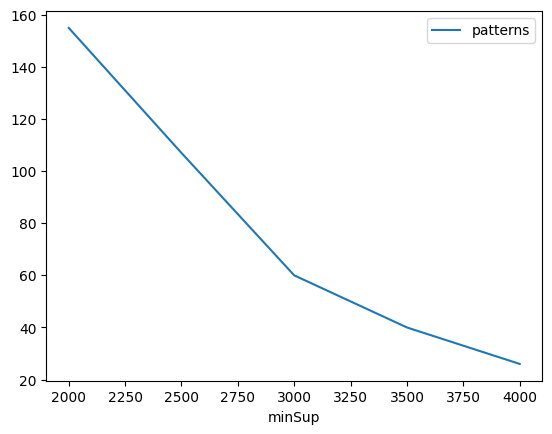

Graph for No Of Patterns is successfully generated!


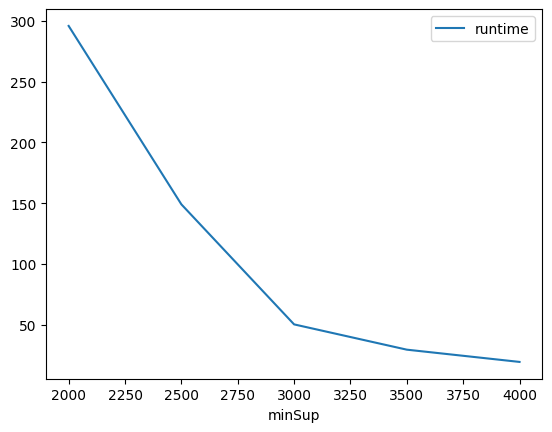

Graph for Runtime taken is successfully generated!


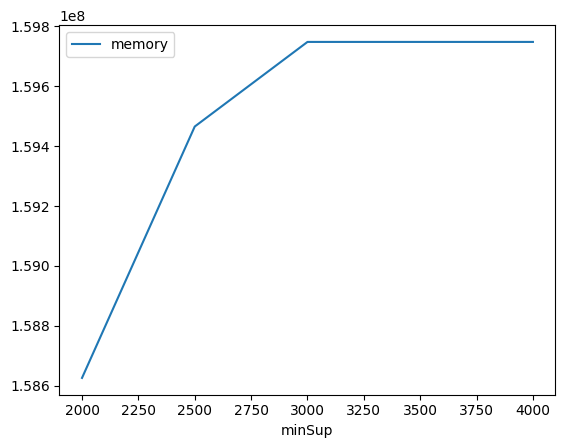

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
